In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
LANGSMITH_API_KEY = os.getenv("LANGSMITH_API_KEY")
if not GEMINI_API_KEY:
    raise ValueError("GEMINI_API_KEY is not set in the .env file.")
print("Gemini api key loaded successfully")

if not LANGSMITH_API_KEY:
    raise ValueError("LANGSMITH_API_KEY is not set in the .env file.")
print("LANGSMITH_API_KEY loaded successfully")

Gemini api key loaded successfully
LANGSMITH_API_KEY loaded successfully


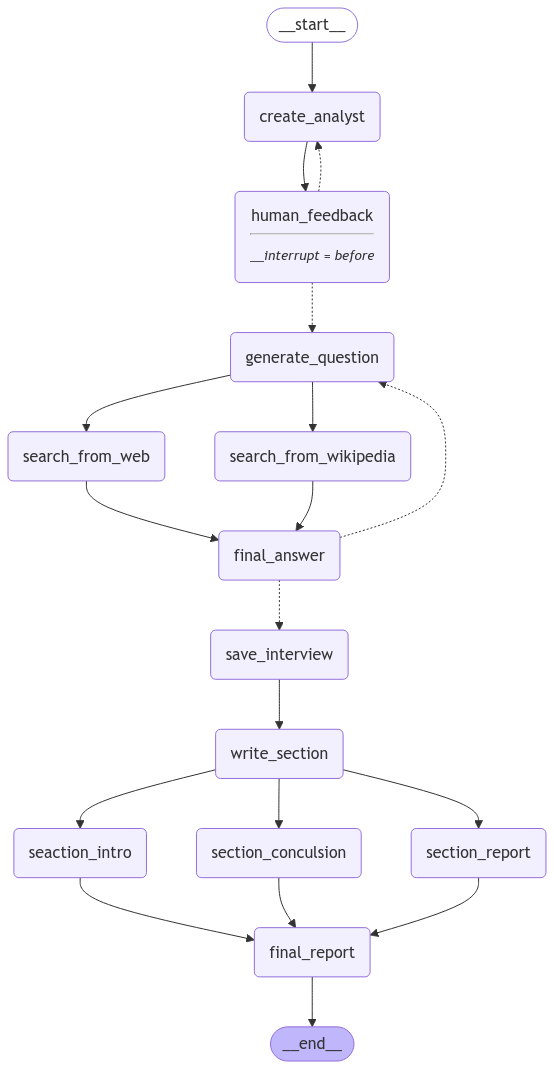

In [52]:
import operator
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.types import Send
from langgraph.graph import END, StateGraph, START
from pydantic import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import display,Image

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key='GEMINI_API_KEY'  )
 
class Analyst(BaseModel):
    affiliation: str = Field(   description="Primary affiliation of the analyst.",   )
    name: str = Field( description="Name of the analyst."  )
    role: str = Field( description="Role of the analyst in the context of the topic.", )
    description: str = Field(  description="Description of the analyst focus, concerns, and motives.", )
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"


  
class OverallState(TypedDict):
    pass_human_feedback:str
    topic_name:str
    analysts: list[Analyst]
 
def create_analyst(state:OverallState):
    pass

def decide_node1(state:OverallState):
    get_human_feedback = state.get('pass_human_feedback','')
    if get_human_feedback:
        return 'create_analyst'
    else:
        topic_name=state['topic_name']
        return [send('generate_question',{"analyst": analyst, "messages": [HumanMessage( content=f"So you said you were writing an article on {topic}?"  ) ]}) for analyst in state["analysts"]]
    
    

def generate_question(state:OverallState):
    pass
def search_from_web(state:OverallState):
    pass
def search_from_wikipedia(state:OverallState):
    pass
def decide_node2(state:OverallState):
    pass
def save_interview(state:OverallState):
    pass
def write_section(state:OverallState):
    pass
def seaction_intro(state:OverallState):
    pass
def section_report(state:OverallState):
    pass
def section_conculsion(state:OverallState):
    pass
def final_report(state:OverallState):
    pass



 
graph = StateGraph(OverallState)
graph.add_node("create_analyst", create_analyst)
graph.add_node("human_feedback", human_feedback)
graph.add_node('generate_question',generate_question)
graph.add_node('search_from_web',search_from_web)
graph.add_node('search_from_wikipedia',search_from_wikipedia)
graph.add_node('final_answer',final_answer)
graph.add_node('save_interview',save_interview)
graph.add_node('write_section',write_section)
graph.add_node('seaction_intro',seaction_intro)
graph.add_node('section_report',section_report)
graph.add_node('section_conculsion',section_conculsion)
graph.add_node('final_report',final_report)

 

 

 
graph.add_edge(START, "create_analyst")
graph.add_edge('create_analyst', "human_feedback")
graph.add_conditional_edges("human_feedback", decide_node1, ["create_analyst", 'generate_question'])
graph.add_edge('generate_question', "search_from_web")
graph.add_edge('generate_question', "search_from_wikipedia")
graph.add_edge('search_from_wikipedia', "final_answer")
graph.add_edge('search_from_web', "final_answer")
graph.add_conditional_edges("final_answer", decide_node2,['generate_question','save_interview'])
 
graph.add_edge('save_interview', "write_section")
graph.add_edge('write_section', "seaction_intro")
graph.add_edge('write_section', "section_report")
graph.add_edge('write_section', "section_conculsion")

graph.add_edge('seaction_intro', "final_report")
graph.add_edge("section_report", 'final_report')
graph.add_edge("section_conculsion", 'final_report')
graph.add_edge("final_report", END)
 

app = graph.compile(interrupt_before=['human_feedback'])

display(Image(app.get_graph(graph).draw_mermaid_png()))
 